# Model Selection Aggregation

<font color='green'>In this practical session, we take a look at the problem of model selection aggregation, where a statistical learning algorithm aims to select a function that performs as well as the best function in some finite set.
The finite nature of this problem will allow us to introduce many statistical phenomena of interest without going too deep into various technicalities present for problems involving an infinite number of candidate functions.
Our main objectives are the following:
</font>
- <font color='green'>becoming familiar with the notion of minimax optimality;</font>
- <font color='green'>understanding the difference between proper and improper learning;</font>
- <font color='green'>introducing a problem instance that is hard for information-theoretic reasons;</font>
- <font color='green'>using the hard problem instance to establish suboptimality of proper learning procedures;</font>
- <font color='green'>showing that an improper procedure based on exponential weighting is "on average" optimal;</font>
- <font color='green'>introducing a learning procedure that guarantees a "high-probability" optimality, which is a stronger notion than being optimal "on average".</font>

## Introduction

In this practical session we consider the problem of *model selection aggregation* comprised of a finite dictionary of functions $\mathcal{A} = \{a_{i} : \mathcal{X} \to \mathcal{Y} : i = 1, \dots, m\}$ and $n$ data points $Z_{i} = (X_{i}, Y_{i}) \in \mathcal{X} \times \mathcal{Y} \subseteq \mathbb{R}^{d} \times \mathbb{R}$ sampled i.i.d. from some unknown distribution $P$. An aggregation procedure aims to output an *aggregate* function $A = A(Z_{1}, \dots, Z_{n}) : \mathbb{R}^{d} \to \mathcal{Y}$ that performs as well as the best function in $\mathcal{A}$ in the sense described below. We will restrict our attention to aggregation procedures constrained to produce convex combinations of elements of $\mathcal{A}$. That is, each function $A = A(Z_{1}, \dots, Z_{n})$ can be uniquely identified by a vector
$W = W(Z_{1}, \dots, Z_{n}) \in \mathbb{R}^{m}$ such that
\begin{equation}
  A = \sum_{i=1}^{m} W_{i}a_{i} = a_{W}
  \quad\text{such that}\quad
  \sum_{i=1}^{m} W_{i} = 1 \text{ and }
  W_{i} \geq 0 \text{ for all }i=1,\dots,m.
\end{equation}

In what follows, we identify the output of an aggregation procedure by a vector $W = W(Z_{1}, \dots, Z_{n})$. In addition, we identify each function $a_{i} \in \mathcal{A}$ via a standard basis vector $e_{i} \in \mathbb{R}^{m}$ (i.e., a vector whose $i$-th element equals $1$ while all the other elements equal $0$). In particular, $a_{i} = a_{e_{i}}$.

## Different Measures of Quality

In this practical session we only consider the quadratic loss function $\ell(a, Z) = (a(X) - Y)^{2}$. Recall that the aim of an aggregate $W$ is to predict as well as the best function in $\mathcal{A}$. Henceforth, the quality of an aggregation procedure $W$ is measured by its *estimation error* $\mathcal{E}_{n, \mathcal{A}, P}(W)$ defined as
\begin{align}
  \mathcal{E}_{n,P,\mathcal{A}}(W)
  &=
  r(a_{W}) - \min_{a \in \mathcal{A}} r(a)
  \\
  &=
  \mathbf{E}_{Z \sim P}[(a_{W}(X) - Y)^{2} \vert Z_{1}, \dots, Z_{n}]
  -  \min_{a \in \mathcal{A}} \mathbf{E}_{Z \sim P}[(a(X) - Y)^{2}].
\end{align}
When $n$, $P$ and $\mathcal{A}$ are clear from the context, we will use the shorthand notation $\mathcal{E}(W) = \mathcal{E}_{n,P,\mathcal{A}}$.

We will study two different measures of quality:

- *In-expectation performance.* The first measure of quality concerns understanding *average* performance of an estimator $W$: given an aggregation procedure $W$ we want to obtain upper bounds $\Delta_{n,m}^{\mathrm{EX}}$ on its expected estimation error
\begin{equation}
  \mathbf{E}_{Z_{1}^{n}}[\mathcal{E}_{n,P,\mathcal{A}}(W)] \leq \Delta_{n,m}^{\mathrm{EX}}.
\end{equation}
where $Z_{1}^{n}$ denotes the observed sample $Z_{1}, \dots, Z_{n}$.
Note that the terms $\Delta_{n,m}^{\mathrm{EX}}$ should only depend on the sample size $n$ and the dictionary size $m$. In particular, we want to obtain performance guarantees that hold for any distribution $P$ and any dictionary of the given size $m$.

- *In-deviations performance*. The second measure of quality concerns understanding the tail behaviour of $\mathcal{E}_{n,P,\mathcal{A}}$. Given a confidence parameter $\delta$ and an aggregation procedure $W$ we want to obtain upper bounds $\Delta_{n,m,\delta}^{\mathrm{PR}}$ that satisfy the following inequality
\begin{equation}
  \tag{1}
  \mathbb{P}_{Z_{1}^{n}}\left( \mathcal{E}_{n,P,\mathcal{A}}(W) \geq \Delta_{n,m,\delta}^{\mathrm{PR}} \right) \leq \delta.
\end{equation}

## Minimax Optimality

A sequence $(\Delta^{\mathrm{EX}}_{n,m})$ is called an (in-expectation) *minimax optimal rate* of model selection aggregation aggregation if the following two conditions hold:
1. There exists an absolute constant $c_{1}$ such that for any dictionary size $m$ the following holds:
\begin{equation}
  \inf_{W} \sup_{P, \mathcal{A} : |\mathcal{A}| = m} \mathbf{E}_{Z_{1}^{n}}[\mathcal{E}_{n,P,\mathcal{A}}(W)]
  \geq c_{1}
  \Delta_{n,m}^{\mathrm{EX}}.
\end{equation}
  The above infimum is taken over all possible aggregation procedures while the above supremum is taken over all possible distributions $P$ supported on $\mathcal{X} \times \mathcal{Y}$ and all dictionaries $\mathcal{A}$ of size $m$ of functions mapping $\mathcal{X}$ to $\mathcal{Y}$.
2. There exists an absolute constant $c_{2}$ and an aggregation procedure $W$ such that for any dictionary size $m$ and any distribution $P$ the following holds:
\begin{equation}
  \mathbf{E}_{Z_{1}^{n}}[\mathcal{E}_{n,P,\mathcal{A}}(W)] \leq c_{2}
  \Delta_{n,m}^{\mathrm{EX}}.
\end{equation}

In the bounded setting with $\mathcal{Y} = [-1, 1]$ the in-expectation minimax optimal rate is equal to 
\begin{equation}
  \tag{2}
  \Delta_{n,M}^{\mathrm{EX}} = \frac{\log m}{n}.
\end{equation}
We will call any aggregation procedure $W$ that attains this rate *expectation-optimal*.

Similarly, we say that an aggregation procedure $W$ is *deviation-optimal* if there exists some absolute constant $c$ such that $W$ satisfies $(1)$ with
\begin{equation}
  \tag{3}
  \Delta_{n,M,\delta}^{\mathrm{PR}} = c \frac{\log m + \log(1/\delta)}{n}.
\end{equation}

<font color='green'>**In this practical session, we will aim to derive expectation-optimal and deviation-optimal procedures for the problem of model selection aggregation. In Exercise 1 you will be asked to prove that deviation optimality implies expectation optimality and hence it is a condition that is harder to satisfy. In what follows we will always assume that $\mathcal{Y}=[-1, 1]$.**</font>

## Proper and Improper Learning

Notice that the performance measure $\mathcal{E}(W)$ as defined by
\begin{equation}
  \mathcal{E}(W) = r(a_{W}) - \min_{a \in \mathcal{A}} r(a)
\end{equation}
does not exactly match the notion of estimation error introduced in the lectures. In the lectures, the estimation error was defined only for *proper* learning algorithms &mdash; algorithms that always output a function from the set $\mathcal{A}$. Thus, for the model selection aggregation problem, an estimator $W$ is proper if and only if it always outputs one of the basis vectors $\{e_{1}, \dots, e_{m}\}$. A canonical example of such an estimator is the empirical risk minimization algorithm that we will explore in the exercises below. In contrast to proper estimators, an estimator that is allowed to output a function outside of the reference class of functions $\mathcal{A}$ is called *improper*.

<font color='green'>**Improper estimators have recently been attracting more and more attention in the literature, since such procedures can offer both computational and statistical advantages. One of the goals of this practical session is to demonstrate a simple scenario where achieving minimax optimal rates is only possible via improper estimators.**</font>

### Exercise 1

In this exercise we show that satisfying the deviation-optimal rate $(3)$ is at least as difficult as satisfying the expectation-optimal rate $(2)$.

Suppose that some aggregation procedure $W$ satisfies the following for any dictionary $\mathcal{A}$ of size $m \geq 2$, any distribution $P$, and any confidence
$\delta \in (0,1)$:
\begin{equation}
  \mathbb{P}_{Z_{1}^{n}}\left(
    \mathcal{E}_{n,P,\mathcal{A}}(W) \geq c_{1}\frac{\log m + \log (1/\delta)}{n} \right) \leq \delta,
\end{equation}
where $c_{1}$ is some absolute constant.

Show that there exists an absolute constant $c_{2}$ such that the estimator $W$ satisfies the following in-expectation guarantee for any dictionary of size $m$ and any distribution $P$:
\begin{equation}
  \mathbf{E}_{Z_{1}^{n}}[\mathcal{E}_{n,P,\mathcal{A}}(W)] \leq c_{2}\frac{\log m}{n}.
\end{equation}


#### Hint

Let $X$ be a non-negative random variable. Then $\mathbf{E}[X] = \int_{0}^{\infty} \mathbb{P}(X > x)dx$.

#### Solution

Let $\mathbb{1}_{A}$ denote the indicator function of the event $A = \{\mathcal{E}(W) - c_{1}\frac{\log m}{n} \leq 0\} $: i.e., $\mathbb{1}_{A} = 1$ if the event $A$ is true and $0$ otherwise. Let $A^{c} = \{ \mathcal{E}(W) - c_{1}\frac{\log m}{n} > 0\}$ denote the complement of the event $A$. Then 
\begin{align}
  \mathbf{E}_{Z_{1}^{n}}\left[\mathcal{E}(W)\right]
  &= \mathbf{E}_{Z_{1}^{n}}\left[\mathcal{E}(W)(\mathbb{1}_{A} + \mathbb{1}_{A^{c}})\right]
  \\
  &= \mathbf{E}_{Z_{1}^{n}}\left[\left(\mathcal{E}(W) - c_{1}\frac{\log m}{n} + c_{1}\frac{\log m}{n}\right)(\mathbb{1}_{A} + \mathbb{1}_{A^{c}})\right]
  \\
  &= c_{1}\frac{\log m}{n} + \mathbf{E}_{Z_{1}^{n}}\left[\left(\mathcal{E}(W) - c_{1}\frac{\log m}{n}\right)(\mathbb{1}_{A} + \mathbb{1}_{A^{c}})\right]
  \\
  &\leq c_{1}\frac{\log m}{n}
    + \mathbf{E}_{Z_{1}^{n}}\left[\left(\mathcal{E}(W) - c_{1}\frac{\log{m}}{n}\right)\mathbb{1}_{A^{c}} \right]
  \\
  &= c_{1}\frac{\log m}{n}
    + \int_{0}^{\infty} \mathbb{P}_{Z_{1}^{n}}\left(\mathcal{E}(W) - c_{1}\frac{\log{m}}{n} > x \right)dx
    &\text{(by the hint)}
  \\
  &\leq c_{1}\frac{\log m}{n}
    + \int_{0}^{\infty} \exp(-nx/c_{1})dx
    &\text{(by the assumption on the in-deviations performance of W)}
  \\
  &= c_{1}\frac{\log (m) + 1}{n}.
\end{align}
Since $m \geq 2$, we have $1 \leq \log(m)/\log(2)$ and hence the result follows by taking $c_{2} = c_{1}(1 + 1/\log(2))$.

## Setting up the Code

We now turn to experiments. First, let us import the necessary dependencies.

In [1]:
import numpy as np # for manipulating arrays.
from matplotlib import pyplot as plt # for plotting.
from math import isclose # for checking if two floating point numbers are close.
from tqdm.notebook import tqdm # for displaying progress bars.
from sklearn.linear_model import Ridge # for fitting ridge regression estimator.

Verifying whether a given estimator $W$ attains the optimal (in-deviations or in-expectation) rate is the focal point of this practical session. Since we will want to test multiple estimators in multiple problem settings, it will be useful to introduce abstractions for an estimator, problem setting and for the  code used to estimate estimation error $\mathcal{E}(W)$.

We begin by introducing an abstraction for an estimator. We will implement particular subclasses later, once we begin to explore the possible procedures for model selection aggregation.

In [2]:
class Estimator(object):
  """ A base class for model selection aggregation estimators. """

  def fit(self, problem):
    """
      :problem: An object of type Problem (implemented in the next cell).
      :returns: A fitted aggregate function a_{w} represented by a vector
        w \in \R^{m} .
    """
    raise NotImplementedError("not implemented")

Next, we introduce an abstraction for a class that represents a problem instance. A problem instance is composed of the sample size $n$, the data generating mechanism $P$ and the dictionary of functions $\mathcal{A}$. The abstract class `Problem` defined below implements some functionality that is common for all problem instances, such as computing the population risk of a function $a_{w}$ when given access to population risks of the dictionary elements (implemented via `self.r`) and given access to an oracle that knows how to compute $L_{2}$ squared norms of functions $a_{w'}$ (implemented via  `self.compute_L2_squared_norm(w')`). The $L_{2}$ squared norm of a function $a_{w'} = \sum_{i=1}^{m}w'_{i}a_{i}$ defined as $\|a_{w'}\|_{L_2}^{2} = \mathbf{E}_{Z}[a_{w'}(X)^{2}]$.

You will notice that some of the methods defining the below class are not implemented. You will be asked to implement them in the next exercise.

In [3]:
class Problem(object):
  """ A base class for problem instances.

  This abstract class provides functionality that is common to all problem
  instances. Two methods, namely, _generate_data and compute_L2_squared_norm
  should be implemented by particular subclasses, since these methods are
  distribution-dependent.
  """

  def __init__(self, A, r, n):
    """ :A: A dictionary of functions [a_1, ..., a_d]. Given a matrix X of size
          n \times d, a dictionary function a returns a vector y = a(X) \in
          \mathbb{R}^{n}, whose i-th element is equal to applying the dictionary
          function a to the i-th row of the matrix X.
        :r: A list of population risks [r(a_1), ..., r(a_m)],
        :n: Sample size.
    """
    self.A = A
    self.r = r
    self.n = n
    self.resample_data()

  def resample_data(self):
    """ This method resamples the observed data Z_{1}, \dots, Z_{n} and stores
    it as class members self.X and self.y. """
    self.X, self.y = self._generate_data()

  def _generate_data(self):
    """ Generates n i.i.d. data points Z_{1} = (X_{1}, Y_{1}), \dots,
    Z_{n} = (X_{n}, Y_{n}).
    
    :returns: The generated data represented as (X, y), where:
      X is an n \times d numpy array whose $i$-th row is equal to X_{i};
      y is an n \times 1 numpy array whose $i$-th element is equal to Y_{i}.
    """
    raise NotImplementedError(
        "This distribution-dependent method should be implemented by a "
        "subclass.")
    
  def compute_L2_squared_norm(self, w):
    """ Given a parameter vector w \in \mathbb{R}^{m}, returns the L2 squared
    norm of the function a_{w} = \sum_{i=1}^{m} w_{i}a_{i}. Recall that the
    L2 squared norm of a function a is given by ||a||_{L2}^{2} = E [a(X)^2]. """
    raise NotImplementedError(
        "This distribution-dependent method should be implemented by a "
        "subclass.")

  def compute_empirical_risk(self, a):
    """ Given a function a computes its empirical risk on the dataset
    (self.X, self.y) stored in this class.

    :a: A function mapping \mathbb{R}^{d} to \mathbb{R}. Given a matrix X of
      size n \times d, the function a should return a vector y = a(X) of size
      n \times 1, whose i-th element is equal to the value of the function a
      applied to the i-th row of the matrix X.
    :returns: The emprical risk of the function a defined as
      R(a) = \frac{1}{n}\sum_{i=1}^{n} (a(X_{i}) - Y_{i})^{2}.
    """
    ############################################################################
    # Exercise 2.1 - fill in the code below.
    return np.average((a(self.X) - self.y)**2)
    ############################################################################

  def compute_r(self, w):
    """ :w: A convex combination of dictionary elements a_{w} =
    \sum_{i=1}^{m} w_{i}a_{i} represented by an m-dimensional vector w.
        :returns: The population risk of the function a_w, that is,
          r(a_w) = E[(a_{w}(X) - Y)^{2}].
    """

    # Let us first check if the parameter vector w defines a convex combination.
    w = np.array(w).flatten()
    assert len(w) == len(self.A)
    assert (w >= 0).all()
    assert isclose(np.sum(w), 1.0, abs_tol=1e-8)

    ############################################################################
    # Exercise 2.2 - fill in the code below.
    # Hint: make use of the abstract method self.compute_empirical_risk.

    # Identify the first non-zero coordinate.
    first_idx = np.argmax(w > 0)
    mu = w[first_idx]

    if isclose(mu, 1.0, abs_tol=1e-8):
      return self.r[first_idx]

    # Let us express the function a_w as mu * a_{first_idx} + (1-mu) * a_{w'}.
    w_prime = np.copy(w)
    w_prime[first_idx] = 0
    w_prime /= (1.0 - mu)

    # Define the basis vector e_{first_idx}.
    e_first_idx = np.zeros_like(w)
    e_first_idx[first_idx] = 1.0

    return mu * self.r[first_idx] + (1.0-mu) * self.compute_r(w_prime) \
        - mu * (1-mu) * self.compute_L2_squared_norm(e_first_idx - w_prime)
    ############################################################################

  def sample_estimation_errors(self, estimator, n_seeds):
    """ This method provides the functionality for generating samples of the
    random variable \mathcal{E}(W).
      :estimator: An object of type Estimator (see the abstract class above)
        that represents the estimator W.
      :n_seeds: Number of different i.i.d. estimates of the estimation error
        \mathcal{E}(W).
      :returns: An array of length n_seeds, whose elements contain i.i.d.
        samples of the random variable \mathcal{E}(W).
    """
    estimation_errors = np.zeros(n_seeds)
    min_r = np.min(self.r)
    for seed_idx, seed in tqdm(enumerate(range(n_seeds)), total=n_seeds):
      np.random.seed(seed)
      self.resample_data()
      w = estimator.fit(self)
      estimation_errors[seed_idx] = self.compute_r(w) - min_r
    return estimation_errors    

### Exercise 2
Fill in the missing implementation details in the `Problem` class.

#### Hint for Exercise 2.2

Make use of the following expression. For any two functions $a, a'$ and $\lambda \in [0, 1]$ we have
\begin{align}
  (\lambda a(X) + (1-\lambda)a'(X) - Y)^{2}
  &= \lambda^{2} (a(X) - Y)^{2} + 2\lambda(1-\lambda)(a(X) - Y)(a'(X) - Y)
  + (1-\lambda)^{2}(a'(X) - Y)^2
  \\
  &= \lambda (a(X) - Y)^{2} - \lambda(1-\lambda)((a(X) - Y)^{2} - 2(a(X) - Y)(a'(X) - Y) + (a'(X) - Y)^{2})
  + (1-\lambda)(a'(X) - Y)^2
  \\
  &= \lambda (a(X) - Y)^{2} - \lambda(1-\lambda)((a(X) - Y) - (a'(x) - Y))^{2}
  + (1-\lambda)(a'(X) - Y)^2
  \\
  &= \lambda (a(X) - Y)^{2} - \lambda(1-\lambda)(a(X) - a'(x))^{2}
  + (1-\lambda)(a'(X) - Y)^2.
\end{align}
In particular, we have
\begin{align}
  r(\lambda a + (1-\lambda)a') = \lambda r(a) - \lambda(1-\lambda)\|a - a'\|_{L_{2}}^{2} + (1-\lambda)r(a').
\end{align}

#### Solution

1. Exercise 2.1. The method `compute_empirical_risk` can be implemented via a simple numpy arithmetics:
```
    return np.average((a(self.X) - self.y)**2)
```

2. Exercise 2.2. Computing the population risk of a convex combination of dictionary elements $a_{w}$ can be done via a repeated application of the above hint. In particular, assuming that $w_{1} > 0$, we may write
$$
  a_{w} = \sum_{i=1}^{n}w_{i}a_{i} = w_{1}a_{1} + (1-w_{1})\underbrace{\left(\sum_{i=2}^{n} \frac{w_{i}}{1-w_{1}}a_{i}\right)}_{a'}.
$$
Thus
$$
  r(a_{w}) = w_{1}r(w_{1}) - w_{1}(1-w_{1})\|a_{1} - a'\|_{L_{2}}^{2}+(1-w_{1})r(a').
$$
The below code snippet provides a sample implementation:
```
    # Identify the first non-zero coordinate.
    first_idx = np.argmax(w > 0)
    mu = w[first_idx]

    if isclose(mu, 1.0, abs_tol=1e-8):
      return self.r[first_idx]

    # Let us express the function a_w as mu * a_{first_idx} + (1-mu) * a_{w'}.
    w_prime = np.copy(w)
    w_prime[first_idx] = 0
    w_prime /= (1.0 - mu)

    # Define the basis vector e_{first_idx}.
    e_first_idx = np.zeros_like(w)
    e_first_idx[first_idx] = 1.0

    return mu * self.r[first_idx] + (1.0-mu) * self.compute_r(w_prime) \
        - mu * (1-mu) * self.compute_L2_squared_norm(e_first_idx - w_prime)
```

### Exercise 3

Estimating how the estimation error $\mathcal{E}(W)$ behaves with increasing sample size $n$ will require multiple calling the class `Problem` method `sample_estimation_errors` once for every sample size $n$. In this exercise, you are asked to implement this functionality by filling in the missing implementation details below. 

In [4]:

class ConvergenceRateExperiment(object):
  """ A class encapsulating the functionality for estimating estimation error
  convergence rates. """
  
  def __init__(self, problems):
    """ :problems: A list of instances of type Problem. """
    self.problems = problems
    self.ns = np.array([problem.n for problem in problems])

  def sample_estimation_errors(self, n_seeds, estimator):
    """ :n_seeds: The number of i.i.d. samples of \mathcal{E}_{problem}(W) that
          should be taken for each problem in self.problems.
        :estimator: An object of type Estimator (see the abstract class above)
          that represents the estimator W.
        :returns: A numpy array of shape (len(self.problems), n_seeds) whose
          i-th row contains n_seeds i.i.d. samples of the estimation error
          for the i-th problem instance.
    """
    ############################################################################
    # Exercise 3 - fill in the code below
    estimation_errors = np.zeros((len(self.problems), n_seeds))
    for problem_idx, problem in tqdm(
        enumerate(self.problems), total=len(self.problems)):
      estimation_errors[problem_idx,:] = \
        problem.sample_estimation_errors(estimator, n_seeds)
    return estimation_errors
    ############################################################################

#### Solution

The method `sample_estimation_errors` may be implemented as follows:
```
    estimation_errors = np.zeros((len(self.problems), n_seeds))
    for problem_idx, problem in tqdm(
        enumerate(self.problems), total=len(self.problems)):
      estimation_errors[problem_idx,:] = \
        problem.sample_estimation_errors(estimator, n_seeds)
    return estimation_errors
```

## Tuning Regularization Parameter of Ridge Regression Estimator

<font color='green'>**This section is meant to demonstrate one of the many possible applications of model selection aggregation - tuning a regularization parameter on held-out data.**</font>



A ridge regression estimator with regularization parameter $\alpha$ is any solution to the following optimization problem
\begin{equation}
  \min_{w\in\mathbb{R}^{d}} \|Xw - y\|_{2}^{2} + \alpha\|w\|^{2}_{2},
\end{equation}
where the $i$-th row of the matrix $X \in \mathbb{R}^{n\times d}$ equals  the $i$-th covariate vector $X_{i}$ and the $i$-th element of $y$ denotes the $i$-th observed target $Y_{i}$.

The next exercise asks you to implement our first subclass of the abstract class `Problem`. Before continuing, please familiarize yourself with the scikit-learn implementation of the ridge regression estimator available at the following hyperlink https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html.


In [5]:
class ParameterTuningProblem(Problem):
  """ An instance of a model selection problem, where the dictionary of
  functions A corresponds to a set of ridge regression estimators with different
  regularization parameters.
  """

  # The below class members define the configuration of the dictionary A.
  init_seed = 0 # numpy seed used to generate the dictionary A.
  d = 100 # Dimension of the covariate vectors.
  n_train = 200 # Number of training data points used to generate the dictionary
                # A.
  noise_std = 2.5 # Standard deviation of the noise. See class method
                  # __generate_gaussian_data.
  
  # The below variable define a list of regularization parameters. Each
  # regularization parameter alpha corresponds to one function in the dictionary
  # A.
  alphas = np.linspace(start=1.0, stop=40.0, num=100)

  # The below class members will be initialized during the first instantiation
  # of an object of this class. See the __initialize_class_members class method.
  w_star = None # The parameter generating the data.
  A = None # The list of fitted ridge estimators, one for each regularization
           # parameters.
  r = None # Population risks of elements of A.
  w_alphas = None # A matrix of size len(alphas) \times d, whose i-th row
                  # equals the parameter vector corresponding to the i-th
                  # dictionary element a_i.

  @classmethod
  def __generate_gaussian_data(cls, n, d, w_star):
    """ A method for generating data from the Gaussian model

          X_{i} ~ N(0, I_{d})
          Y_{i} | X_{i} = x ~ N(<w_star, x>, sigma^{2}),

        where the noise standrad deviation sigma is stored as the class member
        cls.noise_std.

        :n: Number of data points (X_{i}, Y_{i}) to generate.
        :d: Dimensionality of the covariate vectors X_{i}.
        :w_star: The optimal parameter; i.e., the parameter that generates the
          noisy observations.
        :returns: The n data points (X_{i}, Y_{i}) stored into n \times d and
          n \times 1 numpy arrays X and y, respectively.
    """
    ############################################################################
    # Exercise 4.1
    X = np.random.normal(loc=0.0, scale=1.0, size=(n, d))
    y = X @ (w_star.reshape(-1,1)) \
      + np.random.normal(loc=0.0, scale=cls.noise_std, size=(n,1))
    return X, y
    ############################################################################

  @classmethod
  def __initialize_class_members(cls):
    if cls.w_star is not None and cls.A is not None and cls.r is not None:
      # Already initialized.
      return

    np.random.seed(cls.init_seed)
    ############################################################################
    # Exercise 4.2. Initialize the class members:
    #   - cls.w_star ~ N(0, I_{d})
    #   - cls.A - a dictionary of fitted ridge regression estimators.
    #   - cls.r - population risks of elements of the dictionary cls.A.
    #   - cls.w_alphas - parameter vector values of the fitted ridge estimators.

    # Set the parameter w_star that will be used to generate the datasets.
    cls.w_star = np.random.normal(loc=0.0, scale=1.0, size=(cls.d,))
    # Generate training data.
    X, y = cls.__generate_gaussian_data(cls.n_train, cls.d, cls.w_star)

    # The following function will be used to construct dictionary elements from
    # fitted ridge estimators.
    def get_linear_function(w):
      def apply_w(X):
        return X.reshape(X.shape[0], -1) @ w.reshape(-1, 1)
      return apply_w

    # For each regularization parameter in cls.alphas, fit ridge regression
    # estimator to the data (X, y) and populate the arrays cls.A, cls.r and
    # cls.w_alphas.
    cls.w_alphas = np.zeros((len(cls.alphas), cls.d))
    cls.A = []
    cls.r = []
    for alpha_idx, alpha in enumerate(cls.alphas):
      ridge_estimator = Ridge(alpha=alpha, fit_intercept=False, copy_X=True)
      ridge_estimator.fit(X,y.flatten())
      fitted_w = ridge_estimator.coef_
      cls.w_alphas[alpha_idx,:] = fitted_w
      cls.A.append(get_linear_function(fitted_w))
      cls.r.append(np.sum((fitted_w - cls.w_star)**2) + cls.noise_std**2)
    ############################################################################

  def __init__(self, n):
    type(self).__initialize_class_members()
    super().__init__(type(self).A, type(self).r, n)

  def _generate_data(self):
    return type(self).__generate_gaussian_data(
      self.n, type(self).d, type(self).w_star)
    
  def compute_L2_squared_norm(self, w):
    ############################################################################
    # Exercise 4.3
    aggregated_w = np.transpose(type(self).w_alphas) @ w.reshape(-1,1)
    return np.sum(aggregated_w**2)
    ############################################################################


### Exercise 4

Fill in the missing implementation details in class `ParameterTuningProblem`.

#### Solution

1. Exercise 4.1. We can generate the Gaussian data via numpy's `np.random.normal` function:
```
    X = np.random.normal(loc=0.0, scale=1.0, size=(n, d))
    y = X @ (w_star.reshape(-1,1)) \
      + np.random.normal(loc=0.0, scale=cls.noise_std, size=(n,1))
    return X, y
```

2. Exercise 4.2. Recall that the data is follows the distribution
\begin{align}
  X &\sim N(0, I_{d}), \\
  Y \vert X = x &\sim N(\langle w^{*}, x \rangle, \sigma^{2}).
\end{align}
Hence, the population risk of a linear function $\langle w, \cdot \rangle$ can be computed as follows
\begin{align}
  r(\langle w, \cdot \rangle)
  &= \mathbf{E}[(\langle w, X \rangle - Y)^{2}]
  \\
  &= \mathbf{E}[(\langle w - w^{*}, X \rangle - Y + \langle w^{*}, X \rangle)^{2}]
  \\
  &=  \mathbf{E}[(\langle w - w^{*}, X\rangle^{2}]
      +2\mathbf{E}[\langle w - w^{*}, X\rangle (\langle w^{*}, X\rangle - Y)] +
      \mathbf{E}[(Y - \langle w^{*}, X \rangle)^{2}]
  \\
  &=  \mathbf{E}[(\langle w - w^{*}, X\rangle^{2}]
      +2\mathbf{E}[\langle w - w^{*}, X\rangle]\mathbf{E}[\langle w^{*}, X\rangle - Y] +
      \mathbf{E}[(Y - \langle w^{*}, X \rangle)^{2}]
  \\
  &=  \mathbf{E}[(\langle w - w^{*}, X\rangle^{2}]
      +
      \mathbf{E}[(Y - \langle w^{*}, X \rangle)^{2}]
  \\
  &=  \|w - w^{*}\|_{2}^{2}
      +
      \mathbf{E}[(Y - \langle w^{*}, X \rangle)^{2}]
  \\
  &=  \|w - w^{*}\|_{2}^{2}
      +
      \sigma^{2}.
\end{align}
The below code snipped provides one possible solution to Exercise 4.2:
```
    # Set the parameter w_star that will be used to generate the datasets.
    cls.w_star = np.random.normal(loc=0.0, scale=1.0, size=(cls.d,))
    # Generate training data.
    X, y = cls.__generate_gaussian_data(cls.n_train, cls.d, cls.w_star)

    # The following function will be used to construct dictionary elements from
    # fitted ridge estimators.
    def get_linear_function(w):
      def apply_w(X):
        return X.reshape(X.shape[0], -1) @ w.reshape(-1, 1)
      return apply_w

    # For each regularization parameter in cls.alphas, fit ridge regression
    # estimator to the data (X, y) and populate the arrays cls.A, cls.r and
    # cls.w_alphas.
    cls.w_alphas = np.zeros((len(cls.alphas), cls.d))
    cls.A = []
    cls.r = []
    for alpha_idx, alpha in enumerate(cls.alphas):
      ridge_estimator = Ridge(alpha=alpha, fit_intercept=False, copy_X=True)
      ridge_estimator.fit(X,y.flatten())
      fitted_w = ridge_estimator.coef_
      cls.w_alphas[alpha_idx,:] = fitted_w
      cls.A.append(get_linear_function(fitted_w))
      cls.r.append(np.sum((fitted_w - cls.w_star)**2) + cls.noise_std**2)
```

3. Exercise 4.3.
Denote the $i$-th element of the dictionary $\mathcal{A}$ by $a_{i} = \langle w_{\alpha_{i}}, \cdot \rangle$, where $w_{\alpha_{i}}$ denotes the output of the ridge estimator with regularization parameter $\alpha_{i}$. Then, for $w \in \mathbb{R}^{m}$, we have
\begin{align*}
  \|a_{w}\|_{L_{2}}^{2}
  = \mathbf{E}[a_{w}(X)^{2}]
  = \mathbf{E}\left[\left\langle \sum_{i=1}^{m} w_{i}w_{\alpha_{i}}, X \right\rangle^{2}\right]
  = \left\| \sum_{i=1}^{m} w_{i}w_{\alpha_{i}} \right\|_{2}^{2}.
\end{align*}
Hence, Exercise 4.3 may be implemented, for example, via the following two lines of code:
```
     aggregated_w = np.transpose(type(self).w_alphas) @ w.reshape(-1,1)
     return np.sum(aggregated_w**2)
```

### Sanity Check

We have already implemented quite a lot of code without verifying its correctness. The next exercise asks us to perform a few simple tests to see if the classes `Problem` and `ParameterTuningProblem` behave as expected.

#### Exercise 5

- Instantiate an object of type `ParameterTuningProblem` with `n=100`.
- Plot the population risks of the dictionary `ParameterTuningProblem.A`.
- Plot the empirical risks of the dictionary `ParameterTuningProblem.A`.
- Check if your implementation of the method `Problem.compute_r` agrees with the
exact expression of the population risk given in solutions to Exercise 4.2 and Exercise 4.3.

#### Solution

The bellow code cell fulfills the first three bullet points of Exercise 5.

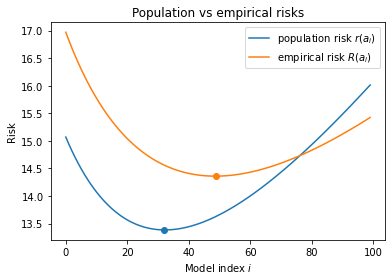

In [26]:
problem = ParameterTuningProblem(n=100)

# Plot the population risks.
plt.plot(ParameterTuningProblem.r)
plt.scatter(np.argmin(ParameterTuningProblem.r), np.min(ParameterTuningProblem.r))

# Compute empirical risks.
R = np.zeros(len(problem.A))
for i in range(len(R)):
  R[i] = problem.compute_empirical_risk(problem.A[i])

# Plot the empirical risks.
plt.plot(R)
plt.scatter(np.argmin(R), np.min(R))
plt.legend([r'population risk $r(a_{i})$', r'empirical risk $R(a_{i})$'])
plt.xlabel(r'Model index $i$')
plt.ylabel(r'Risk')
plt.title('Population vs empirical risks')
plt.show()

The below code cell fulfills the final bullet point of Exercise 5.

In [23]:
# Let us repeat the test three times with a different seed.
for seed in range(3):
  np.random.seed(seed)
  print('seed', seed)

  # Generate a random vector mu that will be used to define a convex combination
  # of dictionary elements.
  w = np.random.normal(0,1,len(type(problem).A))
  w = np.abs(w)
  w = w / np.sum(w)

  # Compute r(a_w) using our implementation from Exercise 2.2.
  generic_method_output = problem.compute_r(w)

  # Now compute r(a_w) using exact formulas available in Exercise 4.2 and
  # Exercise 4.3.
  mixture_w = np.transpose(problem.w_alphas) @ w.reshape(-1,1)
  exact_computation_output = \
    np.sum((mixture_w - problem.w_star.reshape(-1,1))**2) \
    + problem.noise_std**2

  # The below output should be accurate at least to 7 decimal places.
  error = generic_method_output - exact_computation_output
  print('accuracy', error)
  # Make sure that the below assertion does not fail.
  assert isclose(error, 0.0, abs_tol=1e-7)

seed 0
accuracy -3.552713678800501e-15
seed 1
accuracy 1.2434497875801753e-14
seed 2
accuracy -1.7763568394002505e-15


## Empirical Risk Minimization

Now that we have one problem instance implementation ready (i.e., the class `ParameterTuningProblem`), we are ready to implement our first aggregation algorithm.

Given a function class $\mathcal{A}$, an *empirical risk minimizer* $A$ is any solution to the equation
$$
  A \in \mathrm{argmin}_{a \in \mathcal{A}} R(A) =  \mathrm{argmin}_{a \in \mathcal{A}}\frac{1}{n} \sum_{i=1}^{n}(a(X_{i}) - Y_{i})^{2}.
$$
In the context of model selection aggregation, empirical risk minimization corresponds to selecting the estimator with lowest error on the held-out validation dataset. The next exercise asks us to implement the empirical risk minimization estimator and estimate its in-expectation estimation error behaviour as a function of the sample size $n$.

In [8]:
class ERM(Estimator):
  """ An implementation of the empirical risk minimization estimator. """

  def fit(self, problem):
    """ See the base class documentation. """
    ############################################################################
    # Exercise 6.1 - fill in the code below.
    R = np.zeros(len(problem.A))
    for idx, a in enumerate(problem.A):
      R[idx] = problem.compute_empirical_risk(problem.A[idx])
    w = np.zeros(len(problem.A))
    w[np.argmin(R)] = 1.0
    return w
    ############################################################################

### Exercise 6

- Exercise 6.1.
  Fill in the missing implementation details of the class ERM defined in the above cell.
- Exercise 6.2. Let $(\mathcal{A}, P)$ be implemented via the class `ParameterTuningProblem` and let $W$ be implemented via the class `ERM`. Evaluate empirically the rate of decay of the expected estimation error $\mathbf{E}_{Z_{1}^{n}}[\mathcal{E}_{n, P, \mathcal{A}}(W)]$ as a function of sample size $n$ in the range `ns = np.arange(100, 200, step=10)`. Hint: make use of the `ConvergenceRateExperiment` class.
- Exercise 6.3. In the cell defining `ParameterTuningProblem`, try changing the number of regularization parameters $m$, i.e., modify the parameter `num` in line `alphas = np.linspace(start=1.0, stop=40.0, num=100)` (you will need to rerun the cell defining the class `ParameterTuningProblem`). Is the expected estimation error $\mathbf{E}_{Z_{1}^{n}}[\mathcal{E}_{n, P, \mathcal{A}}(W)]$ sensitive to the size of the dictionary $m = |\mathcal{A}|$?


#### Solution

Exercise 6.1. The ERM estimator can be implemented as follows:
```
      R = np.zeros(len(problem.A))
      for idx, a in enumerate(problem.A):
          R[idx] = problem.compute_empirical_risk(problem.A[idx])
      w = np.zeros(len(problem.A))
      w[np.argmin(R)] = 1.0
      return w
```

The below code cell implements a possible solution to Exercise 6.2. Inspecting the generated plot, we can visually conjecture that for a fixed pair $(P, \mathcal{A})$ implemented via the class `ParameterTuningProblem`, the expected estimation error decays as fast as $\mathbf{E}_{Z_{1}^{n}}[\mathcal{E}_{n, P, \mathcal{A}}(W)] = O(1/n)$.

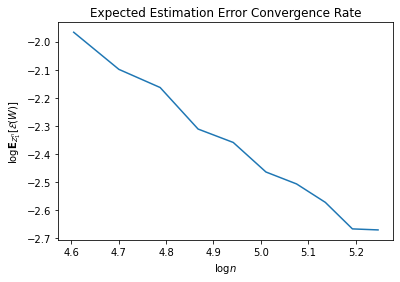

In [9]:
    ridge_problems = [ParameterTuningProblem(n) for n in \
                      np.arange(100, 200, step=10)]
    ridge_tuning_experiment = ConvergenceRateExperiment(ridge_problems)
    estimation_errors = ridge_tuning_experiment.sample_estimation_errors(
      n_seeds=1000, estimator=ERM())

    # Generate a log-log plot of sample size vs expected estimation error.
    plt.plot(np.log(ridge_tuning_experiment.ns),
             np.log(np.mean(estimation_errors, axis=1)))
    plt.xlabel(r'$\log n$')
    plt.ylabel(r'$\log \mathbf{E}_{Z_{1}^{n}}[\mathcal{E}(W)]$')
    plt.title('Expected Estimation Error Convergence Rate')
    plt.show()

Exercise 6.3. Rerunning the above cell a few times after modifying the number of regularization parameters $m$ in the class `ParameterTuningProblem` we conclude that the expected estimation error is not sensitive to the size of the dictionary. <font color='green'>**It is thus plausible, that the empirical risk minimization estimator achieves the expectation-optimal rate $(2)$ (refer to the introduction for details) and at this point we cannot conclude that it is suboptimal. However, recall the minimax notion of optimality requires that the $O(\log m/n)$ expected estimation-error rate holds for any problem (with the constraint that $\mathcal{Y} = [-1, 1])$) and thus, at this point, we cannot conclude that ERM is minimax optimal either.**</font>

## A Hard Problem Instance

In the previous section, we have investigated a model selection aggregation problem $(P, \mathcal{A})$, for which (it appears that) the empirical risk minimization algorithm attains the optimal rate $O(\log m/n)$. Recall, however, that the notion of optimality introduced in the introduction requires that the rate $O(\log m/n)$ holds *uniformly* over all problems $(P, \mathcal{A})$ and thus we cannot yet conclude that the empirical risk minimization estimator is expectation-optimal.

In this section we will show that aggregation via empirical risk minimization (ERM) does, in fact, result in a sub-optimal aggregation procedure. <font color='green'>**To achieve this goal, we first discuss a simple problem that is provably difficult for any algorithm -- identifying whether a coin is biased or not given an insufficient number of coin flips.**</font> We will then leverage the fact that the ERM estimator is constrained to output a function in the set $\{a_{1}, \dots, a_{m}\}$ to informally deduce that an in-expectation convergence rate of order $o(1/\sqrt{n})$ would imply the existence of an estimator that solves an impossible problem. By contradiction, the in-expectation performance of ERM on the ``biased coin  problem'' has to decay as slow as $\Omega(1/\sqrt{n})$, thus proving that the ERM estimator is sub-optimal.

<font color='green'>**We remark that the limitation of ERM discussed in this section applies to all *proper* algorithms**</font>, also called *selectors* in the context of empirical risk minimization.

### Exercise 7

- Exercise 7.1. Let $P_{1}$ and $P_{2}$ denote $\mathrm{Bernoulli}(p_{1})$ and $\mathrm{Bernoulli}(p_{2})$ distributions, with $p_{1} \in \{0.5, 0.5 + \gamma\}$, $p_{2} \in \{0.5, 0.5 + \gamma\}$, $p_{1} \neq p_{2}$ and $\gamma \in (0, 0.5)$. Thus, one of the distributions represents an unbiased coin while the other distribution represents a $\gamma$-biased coin. Suppose that we observe a sequence of $n$ i.i.d. coin flips $X_{1}, \dots, X_{n} \sim P_{1}$ and $n$ i.i.d. coin flips $Y_{1}, \dots, Y_{n} \sim P_{2}$.

  For what values of $\gamma$ can you identify which of the two coins is biased with high confidence (for example, by using the principle of empirical risk minimization)? You are only asked to provide an informal argument.

- Exercise 7.2. Using your answer to Exercise 7.1, suggest a dictionary of two functions $\mathcal{A} = \{a_{1}, a_{2}\}$ and a distribution $P$ such that the ERM estimator $W$ incurs the sub-optimal rate $\mathbf{E}_{Z_{1}^{n}}[\mathcal{E}_{n,P,\mathcal{A}}(W)] = \Omega(1/\sqrt{n}) \gg \Theta(\log (m)/n)$.

#### Solution

- Exercise 7.1. Assume without loss of generality that the first coin is biased (i.e., $p_{1} = 0.5 + \gamma$) and the second coin is unbiased (i.e., $p_{2} = 0.5$). Let
$$\widehat{P}_{1} = \frac{1}{n} \sum_{i=1}^{n} X_{i} \quad\text{and}\quad \widehat{P}_{2} = \frac{1}{n} \sum_{i=1}^{n} Y_{i}.$$
We already know that by [Chernoff bounds](https://en.wikipedia.org/wiki/Chernoff_bound), the following two inequalities hold simultaneously with probability at least $1 - \delta$
\begin{equation}
  \left| (0.5 + \gamma) - \widehat{P}_{1} \right| \leq O\left(\sqrt{\frac{\log(1/\delta)}{n}}\right)
  \quad\text{and}\quad
  \left| 0.5 - \widehat{P}_{2} \right| \leq O\left(\sqrt{\frac{\log(1/\delta)}{n}}\right).
\end{equation}
In particular, if $\gamma = \Omega\left(\sqrt{\frac{\log(1/\delta)}{n}}\right)$, then the empirical risk minimization strategy that returns $\mathrm{argmax}_{i=1,2}\{\widehat{P}_{1}, \widehat{P}_{2}\}$ succeeds with probability at least $1-\delta$.

  In the other direction, it is possible to show that $n = \Omega(1/\gamma^{2})$ coin flips are necessary to identify the biased coin for *any* algorithm. For further details see Lecture 16 and Problem 4.4 of the [Algorithmic Foundations of Learning course](http://www.stats.ox.ac.uk/~rebeschi/teaching/AFoL/20/).

- Exercise 7.2. We need to ``embed'' the biased coin problem described in Exercise 7.1 into the model selection aggregation framework. To do this, consider a distribution $P$ such that $(a_{1}(X) - Y)^2$ is proportional to $\mathrm{Bernoulli}(0.5 - \gamma)$ random variable and $(a_{2}(X) - Y)^{2}$ is proportional to $\mathrm{Bernoulli}(0.5)$ random variable. For instance, this is achieved by letting
\begin{align}
  X = (X_1, X_2) \in \mathbb{R}^{2} &\sim \text{i.i.d. symmetric }\{-1, +1\}\text{ random variables}, \\
  Y \vert X = (x_1, x_2) &\sim \begin{cases}
    x_{1} & \text{with probability 0.5 + } \gamma, \\
    -x_{1} & \text{with probability 0.5 - }\gamma.
  \end{cases}
\end{align}
and
$$
  a_{1}(x) = x_{1} \quad\text{and}\quad a_{2}(x) = x_{2}.
$$
Thus, the function $a_{1}$ agrees with the label $Y$ exactly with probability $0.5 + \gamma$, while the function $a_{2}$ agrees with the label $Y$ half the time. It follows that
$$
  r(a_1) = 2 - 4\gamma \quad\text{and}\quad r(a_2) = 2.
$$
The expected estimation error of the empirical risk minimization algorithm $W$ can be now written as
\begin{equation}
  \mathbf{E}_{Z_{1}^{n}}[\mathcal{E}(W)] = 4\gamma \mathbb{P}_{Z_{1}^{n}}(W = e_{2}).
\end{equation}
Let $\gamma = c_{1}/\sqrt{n}$ for some absolute constant $c_{1}$ and suppose that  $\mathbf{E}_{Z_{1}^{n}}[\mathcal{E}(W)] = O(n^{-(1/2 + \alpha)})$ for some constant $\alpha > 0$. It follows that $\mathbb{P}_{Z_{1}^{n}}(W = e_{2}) = O(n^{-\alpha})$. But this is impossible given our (informal) discussion in the solution of Exercise 7.1 that suggests the contradictory equation
$$c_{1}/\sqrt{n} = \gamma = \Omega(\sqrt{\alpha \log (n) / n}).$$
  We conclude that it must be the case that $\mathbf{E}_{Z_{1}^{n}}[\mathcal{E}(W)] = \Omega(1/\sqrt{n})$.


### Implementing the Biased Coin Problem

We now turn to the implementation of the ``hard'' model selection aggregation problem instance.

In [10]:
class BiasedCoinProblem(Problem):
  """ An implementation of the biased coin problem described in the solution
  of Exercise 7.2.
  """

  def __init__(self, n, m, gamma):
    """ :n: Sample size.
        :m: The number of coins, m-1 of which are unbiased.
        :gamma: The bias of the biased coin.
    """
    self.m = m
    ############################################################################
    # Exercise 8.1
    # Write code defining the following two variables:
    #   - A: a list containg m functions representing the coins;
    #   - r: a list containing the population risks of the functions in A.

    # Given a matrix X, the i-th coin returns the i-th column of X.
    def get_a(idx):
      def a_idx(X):
        return X[:,idx].reshape(-1, 1)
      return a_idx

    # Construct the coins.
    A = [get_a(idx) for idx in range(m)]

    # Set the bias of the biased coin and fill in the population risks list a.
    self.gamma=gamma
    r = np.ones(m) * 2.0
    r[0] -= 4.0 * self.gamma
    ############################################################################
    super().__init__(A, r, n)


  def _generate_data(self):
    ############################################################################
    # Exercise 8.2
    X = np.random.binomial(n=1, p=0.5, size=(self.n, self.m))*2.0 - 1.0
    y = X[:,0].copy().reshape(-1, 1)

    biased_mask = np.random.binomial(n=1, p=0.5 + self.gamma, size=(self.n,1))*2.0 - 1.0
    # If biased_mask[i] = -1 then the label y[i] will be flipped. This happens
    # with probability 0.5 - gamma.
    y *= biased_mask
    
    return X, y
    ############################################################################

  def compute_L2_squared_norm(self, w):
    ############################################################################
    # Exercise 8.3
    return np.sum(w**2)
    ############################################################################

#### Exercise 8

- Exercise 8.1, 8.2 and 8.3. Generalize the argument of solution to the Exercise 7.2 to $m$ functions/coins and implement the missing details of the  `BiasedCoinProblem` class in the above cell.
- Exercise 8.4. Verify empirically the conclusion of Exercise 7.2. More specifically, for the problem instance $(P, \mathcal{A})$ implemented by the class `BiasedCoinProblem` (with $m=2$) and the empirical risk minimization estimator $W$, show empirically that $\mathbf{E}_{Z_{1}^{n}}[\mathcal{E}_{n,P,\mathcal{A}}(W)] = \Omega(1/\sqrt{n})$.

##### Solution

- Exercise 8.1.

```
    # Given a matrix X, the i-th coin returns the i-th column of X.
    def get_a(idx):
      def a_idx(X):
        return X[:,idx].reshape(-1, 1)
      return a_idx

    # Construct the coins.
    A = [get_a(idx) for idx in range(m)]

    # Set the bias of the biased coin and fill in the population risks list a.
    self.gamma=gamma
    r = np.ones(m) * 0.5
    r[0] -= self.gamma
```

- Exercise 8.2.

```
    X = np.random.binomial(n=1, p=0.5, size=(self.n, self.m))
    y = X[:,0].copy().reshape(-1, 1)

    biased_mask = np.random.binomial(n=1, p=0.5 - self.gamma, size=(self.n,1))
    # If biased_mask[i] = 1, y[i] will be flipped. Otherwise y[i] remains
    # unchanged.
    y += biased_mask
    y %= 2
    
    return X, y    L2_squared_norm = 1.0/4.0 * np.sum(w)**2
    L2_squared_norm += 1.0/4.0 * np.sum(w**2)
```

- Exercise 8.3. Let $I_{m} \in \mathbb{R}^{m \times m}$ denote the $m \times m$ identity matrix. Notice that
\begin{align*}
  \|a_{w}(X)\|_{L_2(P)}^{2}
  &= \mathbf{E}\left[\langle w, X \rangle^{2}\right]
  \\
  &= w^{\mathsf{T}}\mathbf{E}\left[XX^{\mathsf{T}}\right]w
  \\
  &= w^{\mathsf{T}}I_{m}w
  \\
  &= \|w\|_{2}^{2}.
\end{align*}
Thus, the solution to this exercise may be implemented as follows:
```
    return np.sum(w**2)
```

A possible implementation of Exercise 8.4 is provided in the following cell.

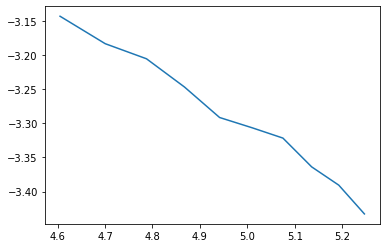

In [11]:
biased_coin_problems = [BiasedCoinProblem(n=n, m=2, gamma=0.5/np.sqrt(n)) \
                        for n in np.arange(100, 200, step=10)]
biased_coin_experiment = ConvergenceRateExperiment(biased_coin_problems)
erm_errors = biased_coin_experiment.sample_estimation_errors(
    n_seeds=10000, estimator=ERM())
# Now generate a log-log plot of mean errors vs the sample size.
# Note that the slope generated in the plot below is approximately equal to -0.5
# suggesting that the mean estimation error scales as \Omega(1/\sqrt{n}). 
plt.plot(np.log(biased_coin_experiment.ns), np.log(np.mean(erm_errors, axis=1)))

## Exponential Weights Algorithm

In the previous section we have established that empirical risk minimization (or any other proper algorithm) does not yield an in-expectation optimal estimator for the problem of model selection aggregation.
<font color='green'>**In Exercise 9, we will derive the exponential weights algorithm that achieves the in-expectation goal of optimal model selection aggregation. By our previous discussions, such an estimator is necessarily improper.**</font>

Recall that an estimator $W$ is expectation-optimal if 
\begin{equation}
  \mathbf{E}\, r(W) - \min_{i=1,\dots,m} r(e_{i}) \leq c \frac{\log m}{n}
  \tag{4}
\end{equation}
for some absolute constant $c$. Exercise 9 will guide you through a series of derivations that yield an upper bound of the form
$$
- \min_{i=1,\dots,m} r(e_{i}) \leq \dots \text{ (Exercise 9) }\dots \leq \mathbf{E}_{Z_1^{n}}r(W(Z_{1}, \dots, Z_{n})) + c \frac{\log m}{n}.
$$
The resulting $W = W(Z_{1},\dots, Z_{n})$ will then provide us with the desired expectation-optimal estimator.

Before we proceed, we introduce some additional notation. For any fixed $w \in \mathbb{R}^{m}$, it will be convenient to rewrite
$$
  r(w) = \mathbf{E}_{Z}[(a_{w}(X) - Y)^{2}] = \mathbf{E}_{Z_{n+1}}[(a_{W}(X_{n+1}) - Y_{n+1})^{2}],
$$
 where we have relabeled the sample $Z$ to $Z_{n+1}$. Finally, we let
$$
  R_{n+1}(w) = \frac{1}{n+1}\sum_{i=1}^{n+1}(a_{w}(X_{i}) - Y_{i})^{2}
$$
and thus remark that for any fixed $w$ (i.e., for $w$ independent of $Z_{1}, \dots, Z_{n+1}$) the following identity is true
$$
  r(w) = \mathbf{E}_{Z_{1}^{n+1}} R_{n+1}(w).
$$
We are now ready to introduce Exercise 9.


### Exercise 9

Recall that in this section we work under the assumption $\mathcal{Y} = [-1, 1]$.

- Exercise 9.1. Show that for any $\lambda > 0$ the following inequality holds:
\begin{equation}
\tag{5}
-\min_{i=1,\dots,m} \mathbf{E}_{Z_{1}^{n+1}} R_{n+1}(e_{i}) \leq   \mathbf{E}_{Z_{1}^{n+1}} \left[ \frac{1}{\lambda}\log \left(\sum_{i=1,\dots,m} \exp(-\lambda R_{n+1}(e_{i})) \right) \right].
\end{equation}
- Exercise 9.2. Use the inequality of Exercise 9.1 to find an estimator $W$ that satisfies the expectation-optimal rate stated in equation $(4)$ with the absolute constant $c=8$.

  Hint: you may use without proof the fact that for any $\lambda \in (0, 1/8)$ and any $y \in \mathcal{Y}$, the function $f_{y} : \mathcal{Y} \to \mathbb{R}$ given by $f_{y}(y') = \exp(-\lambda(y - y')^{2})$ is concave. In particular, for any $y, y'_{1}, \dots, y'_{m} \in \mathcal{Y}$ and $u_{1}, \dots, u_{m} \geq 0$ satisfying $\sum_{i=1}^{m} u_{i} = 1$, it holds that $\sum_{i=1}^{n}u_{i}f_{y}(y_{i}) \leq f_{y}(\sum_{i=1}^{m}u_{i}y_{i})$.

#### Solution

- Exercise 9.1. We use the technique of approximating maximum by a finite sum inside a logarithm:
\begin{align}
  - \min_{i=1,\dots,n} \mathbf{E}_{Z_{1}^{n+1}} [R_{n+1}(e_{i})]
  &= \max_{i=1,\dots,n} \mathbf{E}_{Z_{1}^{n+1}} [-R_{n+1}(e_{i})]
  \\
  &\leq
  \mathbf{E}_{Z_{1}^{n+1}} \left[ \max_{i=1,\dots,m} -R_{n+1}(e_{i}) \right]
  \\
  &=
  \mathbf{E}_{Z_{1}^{n+1}} \left[ \frac{1}{\lambda}\log \left(
     \max_{i=1,\dots,m} \exp(-\lambda R_{n+1}(e_{i})) \right) \right]
  \\
  &\leq
  \mathbf{E}_{Z_{1}^{n+1}} \left[ \frac{1}{\lambda}\log \left(
     \sum_{i=1,\dots,m} \exp(-\lambda R_{n+1}(e_{i})) \right) \right].
\end{align}

- Exercise 9.2. We follow the proof idea outlined at the introduction of this section, namely, we will attempt to further develop the right hand side of equation $(5)$ into
$$
  -\min_{i=1,\dots,m} r(e_{i})  \leq -\mathbf{E}_{Z_{1}^{n+1}}(a_{W}(X_{n+1}) - Y_{n+1})^{2} + c\frac{\log m}{n}
$$
for some absolute constant $c>0$ and some estimator $W$ (i.e., a random variable that depends only on $Z_{1},\dots,Z_{n}$ and not on $Z_{n+1})$). If the latter condition is satisfied, then
$$
  \mathbf{E}_{Z_{1}^{n+1}}(a_{W}(X_{n+1}) - Y_{n+1})^{2}
  = \mathbf{E}_{Z_{1}^{n}}[\mathbf{E}_{Z_{n+1}}[(a_{W}(X_{n+1}) - Y_{n+1})^{2} \vert Z_{1}, \dots, Z_{n}]] = \mathbf{E}_{Z_{1}^{n}}[r(W) \vert Z_{1}, \dots, Z_{n}].
$$

  Before proceeding with the solution let us define some additional notation. For $i=0,\dots,n+1$ define the empirical risk computed on the first $i$ samples and normalized by $n+1$ by
  $$
    R_{i}(a) = \frac{1}{n+1}\sum_{j=1}^{i}(a(X_{j}) - Y_{j})^{2},
  $$
  with the convention that $R_{0}(\cdot) = 0$.
  Further, for $i\in\{0,\dots,m\}$ and $j\in{1,\dots,n}$ define the random variables
  $$
    U^{(j)}_{i} = \exp(-\lambda R_{j}(e_{i}))
    \quad\text{and}\quad
    \overline{U}^{(j)}_{i} = \frac{U^{(j)}_{i}}{\sum_{k=1}^{m}U^{(j)}_{k}}.
  $$
  
  <font color='green'>**The key insight into the solution of this exercise is the following identity
  that holds for the right hand side of equation $(5)$**</font>:
  $$
    \log\left(\sum_{i=1}^{m}U^{(n+1)}_{i}\right)
    = \log\left(\sum_{i=1}^{m}\exp(-\lambda R_{n+1}(e_{i}))\right)
    = \log\left(\sum_{i=1}^{m}U^{(n)}_{i}\exp\left(-\frac{\lambda}{n+1}(Y_{n+1} - a_{i}(X_{n+1}))^{2}\right)\right).
  $$
  In particular, notice that if we could cancel the $\exp$ and $\log$ functions,
  then we would arrive to an an expression of weighted losses of the dictionary elements $\{a_{1},\dots,a_{m}\}$ with weights that only depend on the first $n$ data points. While the canceling of $\exp$ and $\log$ is not justified for the weights $(U^{(n)}_{i})_{i=1}^{m}$, it is justified by the hint for the weights $(\overline{U}^{(n)}_{i})_{i=1}^{m}$. This suggests to rewrite the above equation as follows:
  \begin{align}
    \log\left(\sum_{i=1}^{m}U^{(n+1)}_{i}\right)
    &=
    \log\left(\frac{\sum_{i=1}^{m}U^{(n+1)}_{i}}{\sum_{i=1}^{m}U^{(n)}_{i}}\right)
    + \log\left(\sum_{i=1}^{m}U^{(n)}_{i}\right)
    \\
    &=
    \log\left(\sum_{i=1}^{m}\overline{U}^{(n)}_{i}\exp\left(-\frac{\lambda}{n+1}(Y_{n+1} - a_{i}(X_{n+1}))^{2}\right)\right)
     + \log\left(\sum_{i=1}^{m}U^{(n)}_{i}\right)
    \\
    &\leq
    \log\left(\exp\left(-\frac{\lambda}{n+1}\left(Y_{n+1} - \sum_{i=1}^{m}\overline{U}^{(n)}_{i}a_{i}(X_{n+1})\right)^{2}\right)\right)
     + \log\left(\sum_{i=1}^{m}U^{(n)}_{i}\right)
     \\
    &=
    -\frac{\lambda}{n+1}\left(Y_{n+1} - \sum_{i=1}^{m}\overline{U}^{(n)}_{i}a_{i}(X_{n+1})\right)^{2}
     + \log\left(\sum_{i=1}^{m}U^{(n)}_{i}\right)
    \\
    &=
    -\frac{\lambda}{n+1}\left(Y_{n+1} - a_{\overline{U}^{(n)}}(X_{n+1})\right)^{2}
     + \log\left(\sum_{i=1}^{m}U^{(n)}_{i}\right),
  \end{align}
  where the inequality step follows by applying the hint for $\lambda \leq (n+1)/8$.
  Plugging the above into equation $(5)$ yields
  \begin{align}
   -\min_{i=1,\dots,m} \mathbf{E}_{Z_{1}^{n+1}} R_{n+1}(e_{i})
   &\leq   \mathbf{E}_{Z_{1}^{n+1}} \left[ \frac{1}{\lambda}\log \left(\sum_{i=1,\dots,m} \exp(-\lambda R_{n+1}(e_{i})) \right) \right]
   \\
   &=   \mathbf{E}_{Z_{1}^{n+1}} \left[ \frac{1}{\lambda}\log \left(\sum_{i=1}^{m}U^{(n+1)}_{i} \right) \right]
   \\
   &\leq
   -\frac{1}{n+1}\mathbf{E}_{Z_{1}^{n+1}}\left[
\left(Y_{n+1} - a_{\overline{U}^{(n)}}(X_{n+1})\right)^{2}
     \right]
     + \mathbf{E}_{Z_{1}^{n+1}} \left[ \frac{1}{\lambda}\log \left(\sum_{i=1}^{m}U^{(n)}_{i} \right) \right]
   \\
   &=
   -\frac{1}{n+1}\mathbf{E}_{Z_{1}^{n}}\left[r(\overline{U}^{(n)}) \vert Z_{1}, \dots, Z_{n}\right]
     + \mathbf{E}_{Z_{1}^{n+1}} \left[ \frac{1}{\lambda}\log \left(\sum_{i=1}^{m}U^{(n)}_{i} \right) \right].
  \end{align}
  Repeating the above chain of inequalities a total of $n+1$ times, we obtain that for any $\lambda \leq (n+1)/8$ it holds that
  \begin{align}
   -\min_{i=1,\dots,m} \mathbf{E}_{Z_{1}^{n+1}} R_{n+1}(e_{i})
   &\leq
   -\frac{1}{n+1}\sum_{i=0}^{n}\mathbf{E}\left[r(\overline{U}^{(i)}) \vert Z_{1},\dots,Z_{n}\right] + \frac{1}{\lambda} \log\left(\sum_{i=1}^{m} U^{(0)}_{i}\right)
   \\
   &\leq
      -\mathbf{E}\left[r\left(\frac{1}{n+1}\sum_{i=0}^{n}\overline{U}^{(i)}\right) \vert Z_{1},\dots,Z_{n}\right] + \frac{1}{\lambda} \log\left(\sum_{i=1}^{m} U^{(0)}_{i}\right),
  \end{align}
  where the last line follows by convexity of the quadratic loss.
  Plugging in $\lambda = (n+1)/8$, $U^{(0)}_{i} = 1$ and rearranging the above equation yields the desired result:
  \begin{align}
   \mathcal{E}\left(\frac{1}{n+1}\sum_{i=0}^{n}\overline{U}^{(i)}\right)
   \leq 8\frac{\log m}{n+1}.
  \end{align}

  In Learning Theory literature, the estimator
  \begin{equation}
    \tag{6}
    W = \frac{1}{n+1}\sum_{i=0}^{n}\overline{U}^{(i)}
  \end{equation}
  is known by the names *exponential weights algorithm*, *progressive mixture rule* and *weighted majority algorithm*.



### Exercise 10

- Exercise 10.1. Implement the exponential weights algorithm stated in equation $(6)$ by completing the code in the next cell. 

In [12]:
class ExponentialWeightsEstimator(Estimator):

  def __init__(self, mu):
    """ :mu: The rescaled parameter mu = (n+1)*lambda from the notation used in
    Exercise 9. Note that `lambda` is a reserved keywork in python. """
    self.mu = mu

  def fit(self, problem):
    """ See the base class documentation. """
    ############################################################################
    # Exercise 10.1 - fill in the code below
    # First compute an m \times n losses, where losses_{i,j} is the quadratic
    # error of the estimator a_{j} on the j-th data point (x_{j}, y_{j}).
    losses = np.zeros((len(problem.A), problem.n))
    for idx, a in enumerate(problem.A):
      losses[idx, :] = ((a(problem.X) - problem.y).flatten())**2

    # Below we follow the notation used in the proof of Exercise 9.2.
    u_0 = np.ones(len(problem.A))
    overline_u_0 = u_0 / np.sum(u_0)
    w = overline_u_0

    cummulative_losses = np.cumsum(losses, axis=1)
    for i in range(problem.n):
      # Subtract the maximum from cummulative losses to prevent underflows and
      # overflows. Note that subtracting a constant from cummulative losses
      # does not affect the computation of the weights \overline{U}^{(i)}.
      cummulative_losses[:,i] -= np.max(cummulative_losses[:,i])
      u_i = np.exp(-self.mu * cummulative_losses[:,i])
      overline_u_i = u_i / np.sum(u_i)
      w += overline_u_i
      
    w /= (problem.n + 1)
    return w
    ############################################################################

- Exercise 10.2. Run the following code cell. Investigate the experiment output stored in the `ewa_errors` variable.
  - Do the experimental results suggest that the exponential weights algorithm achieve the **expectation-optimal** estimation error rate?
  - Do the experimental results suggest that the exponential weights algorithm achieve the **deviation-optimal** estimation error rate?

In [13]:
biased_coin_problems = [BiasedCoinProblem(n=n, m=2, gamma=0.5/np.sqrt(n)) \
                        for n in np.arange(100, 200, step=10)]
biased_coin_experiment = ConvergenceRateExperiment(biased_coin_problems)
ewa_errors = biased_coin_experiment.sample_estimation_errors(n_seeds=10000, estimator=ExponentialWeightsEstimator(mu=1.0/8.0))

#### Solution

- Exercise 10.1.
```
    # First compute an m \times n losses, where losses_{i,j} is the quadratic
    # error of the estimator a_{i} on the j-th data point (x_{j}, y_{j}).
    losses = np.zeros((len(problem.A), problem.n))
    for idx, a in enumerate(problem.A):
      losses[idx, :] = ((a(problem.X) - problem.y).flatten())**2

    # Below we follow the notation used in the proof of Exercise 9.2.
    u_0 = np.ones(len(problem.A))
    overline_u_0 = u_0 / np.sum(u_0)
    w = overline_u_0

    cummulative_losses = np.cumsum(losses, axis=1)
    for i in range(problem.n):

      # Subtract the maximum from cummulative losses to prevent underflows and
      # overflows. Note that subtracting a constant from cummulative losses
      # does not affect the computation of the weights \overline{U}^{(i)}.
      cummulative_losses[:,i] -= np.max(cummulative_losses[:,i])
      u_i = np.exp(-self.mu * cummulative_losses[:,i])
      overline_u_i = u_i / np.sum(u_i)
      w += overline_u_i
      
    w /= (problem.n + 1)
    return w
```


- Exercise 10.2. To verify that the exponential weights algorithm achieves the expectation optimal deviation rate we may compute the means along the first axis in the `ewa_errors` variable.

In [14]:
print(np.mean(ewa_errors,axis=1))

[-0.26662513 -0.26421464 -0.26373981 -0.26256748 -0.2609109  -0.26048061
 -0.25934904 -0.25804376 -0.25801024 -0.25797982]


As the outputted means are negative, the experimental results verify that the exponential weights algorithm attains the expectation optimal rate for this problem instance. This is not unexpected as we have established such result theoretically in Exercise 9.

Next, we investigate the tail-behaviour of the experiments output. Let us sort the `ewa_errors` variable and plot the outputs for three different experimental setups (corresponding to different choices of `n` and `gamma`). 

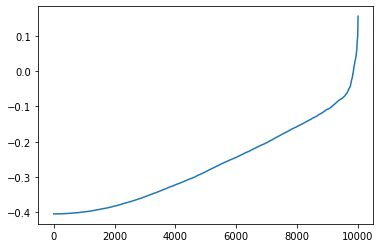

In [15]:
sorted_ewa_errors = np.sort(ewa_errors, axis=1)
plt.plot(sorted_ewa_errors[0,:])

<font color='green'>**The plot generated in the above cell suggest that the exponential weights algorithm is not deviation optimal as on an event of low probability it incurs an estimation error of similar order as the parameter `gamma`**</font>. Indeed, let us average the estimation error over $10$ worst outcomes for each experimental setup and generate a log-log plot versus the sample size $n$.

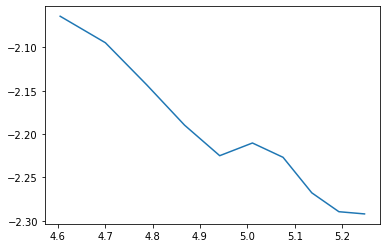

In [16]:
worst_outcomes = np.mean(sorted_ewa_errors[:,-10:], axis=1)
plt.plot(np.log(biased_coin_experiment.ns), np.log(worst_outcomes))

The above plot suggests that on an event of low probability, the exponential weights algorithm incurs the "slow rate" estimation error of oder $1/\sqrt{n}$. This is indeed the case; see the bibliographic remarks section for references.

## The Star/Midpoint Estimator

<font color='green'>**The next exercise is designed to guide you through the development of (one of many) deviation-optimal aggregation procedures. The key technical tool in proving the desired bound is Bernstein's concentration inequality. The key property of the problem allowing for fast rate of order $O(1/n)$ is the curvature of the quadratic loss.**</font>

### Exercise 11
Recall that we work under the constraint $\mathcal{Y} = [-1, 1]$. For any function $a : \mathcal{X} \to \mathcal{Y}$ we introduce the following shorthand notation for population and empirical $L_{2}$ norms:
\begin{align*}
  \|a\|_{2}^{2} &= \|a\|_{L_{2}(P)}^{2} = \mathbf{E}[a(X)^{2}],\\
  \|a\|_{n}^{2} &= \frac{1}{n} \sum_{i=1}^{n} a(X_{i})^{2}.
\end{align*}

#### Exercise 11.1

Prove that for any two functions $a, a' : \mathcal{X} \to \mathcal{Y}$ the following inequality holds with probability at least $1 - \delta$:
$$
  r(a) - r(a') \leq R(a) - R(a') +
  c\left(\sqrt{\frac{\|a-a'\|_{n}^{2} \log(2/\delta)}{n}} + \frac{\log(2/\delta)}{n} \right),
$$
where $c$ is some absolute constant.

##### Hint

Consider the following decomposition:
\begin{align*}
  &(r(a) - r(a')) - (R(a) - R(a'))
  \\
  &= \left( \|a - a'\|_{2}^{2} + 2\mathbf{E}[(a - a')(a' - Y)]\right)
  - \left( \|a - a'\|_{n}^{2} + \frac{2}{n}\sum_{i=1}^{n}(a(X_{i}) - a'(X_{i}))(a'(X_{i}) - Y_{i})\right)
  \\
  &\leq
  \underbrace{\|a - a'\|_{2}^{2} - \|a - a'\|_{n}^{2}}_{T_{1}}
  +
  2\cdot\underbrace{\mathbf{E}[(a - a')(a' - Y)] - \frac{1}{n}\sum_{i=1}^{n}(a(X_{i}) - a'(X_{i}))(a'(X_{i}) - Y_{i})
  }_{T_{2}}.
\end{align*}

Apply Bernstein's inequality to the terms $T_1$ and $T_2$.

##### Solution

Since $\mathcal{Y} = [-1, 1]$ we have
$\mathbf{E}[(a(X) - a'(X))^{4}] \leq 4 \mathbf{E}[(a(X) - a'(X))^{2}] = 4\|a-a'\|_{2}^{2}$
and $\mathbf{E}[(a(X) - a'(X))^{2}(a'(X) - Y)^{2}] \leq 4 \mathbf{E}[(a(X) - a'(X))^{2}] = 4\|a - a'\|^{2}$. Define the events
$$
  E_{1} = \left\{    T_{1} \geq \sqrt{\frac{8\|a - a'\|_{2}^{2}\log(2/  \delta)}{n}}
    + \frac{4\log(2/\delta)}{3n}
    \right\},
    \quad
  E_{2} = \left\{    T_{2} \geq \sqrt{\frac{8\|a - a'\|_{2}^{2}\log(2/  \delta)}{n}}
    + \frac{2\log(2/\delta)}{3n}
    \right\}.
$$
Notice that on the event $E_{1}^{c}$ we have
\begin{align*}
  &\|a-a'\|_{2}^{2} \leq \|a-a'\|_{n}^{2} + 
  \sqrt{\frac{8\|a - a'\|_{2}^{2}\log(2/  \delta)}{n}}
    + \frac{4\log(2/\delta)}{3n}
    \\
    \implies&
    \|a-a'\|_{2}^{2} \leq 2\|a-a'\|_{n}^{2} + 
    \underbrace{
  \sqrt{\frac{8\|a - a'\|_{2}^{2}\log(2/  \delta)}{n}}
  - \|a-a'\|_{2}^{2}
  }_{\leq (2\log(2/\delta))/n \text{ by optimizing with respect to }\|a-a'\|_{2}}
    + \frac{4\log(2/\delta)}{3n}
    \\
    \implies&
    \|a-a'\|_{2}^{2} \leq 2\|a-a'\|_{n}^{2}
    + \frac{10\log(2/\delta)}{3n}.
\end{align*}
Thus, on the event $(E_{1} \cup E_{2})^{c}$ we have
\begin{align*}
  r(a) - r(a') - (R(a) - R(a'))
  &= T_{1} + 2T_{2}
  \\
  &\leq
  3\sqrt{\frac{8\|a - a'\|_{2}^{2}\log(2/  \delta)}{n}}
    + \frac{8\log(2/\delta)}{3n}
  \\
  &\leq
  3\sqrt{\frac{16\|a - a'\|_{n}^{2}\log(2/  \delta)}{n} + \frac{80 \log(2/\delta)^{2}}{3n^2}}
    + \frac{8\log(2/\delta)}{3n}
  \\
  &\leq
  12\sqrt{\frac{\|a - a'\|_{n}^{2}\log(2/  \delta)}{n}}
  + \left(\sqrt{\frac{80}{3}} + \frac{8}{3}\right)\frac{\log(2/\delta)}{n}
  \\
  &\leq
  12\sqrt{\frac{\|a - a'\|_{n}^{2}\log(2/  \delta)}{n}}
  + 8\frac{\log(2/\delta)}{n}.
\end{align*}
By Bernstein's inequality we have
$$
  \mathbb{P}_{Z_{1}^{n}}\left(
    E_{1}
  \right)
  \leq \delta/2
  \quad\text{and}\quad
  \mathbb{P}_{Z_{1}^{n}}\left(
    E_{2}
  \right)
  \leq \delta/2.
$$
In particular,
$$
  \mathbb{P}((E_{1} \cup E_{2})^{c})
  = 1 - \mathbb{P}(E_{1} \cup E_{2})
  \geq 1 - \mathbb{P}(E_{1}) - \mathbb{P}(E_{2})
  \geq 1 - \delta.
$$
The proof is thus complete.

#### Exercise 11.2


We will now consider a simplified setting of model selection aggregation problem with $m = 2$, that is, $\mathcal{A} = \{a_{1}, a_{2}\}$. In Exercise 11.3 we will design an improper learning algorithm that outputs a function in the enlarged class $\overline{A} = \{a_{1}, a_{2}, (a_{1} + a_{2})/2\}$ and achieves the deviation-optimal estimation error rate.

The intuition to additionally consider the midpoint $(a_{1} + a_{2})/2$ comes from the following equation (recall the computations provided in the hint for Exercise 2.2):
$$
  r((a_{1} + a_{2})/2) = \frac{1}{2}(r(a_{1}) + r(a_{2})) - \frac{1}{4}\|a_{1} - a_{2}\|_{2}^{2}.
$$
In particular, if $\|a_{1} - a_{2}\|_{2}^{2}$ is sufficiently large, the midpoint
$(a_{1} + a_{2})/2$ might incur a significantly smaller risk than either $a_{1}$ or $a_{2}$.

By completing the code cell below, you are first asked to provide empirical evidence that empirical risk minimization over $\overline{\mathcal{A}}$ fails to achieve the expectation-optimal (and hence also deviation-optimal) estimation error rate.

In [18]:
class ImproperERM(Estimator):
  """ An implementation of the (improper) empirical risk minimization algorithm.
  """

  def fit(self, problem):
    # In this problem we only consider m = 2.
    assert len(problem.A) == 2

    erm = ERM()
    erm_w = erm.fit(problem)
    erm_idx = np.argmax(erm_w)
    erm_R = problem.compute_empirical_risk(problem.A[erm_idx])
    # We will not check if the midpoint (a_1 + a_2)/2 achieves better empirical
    # risk.
    def midpoint_a(X):
      return (problem.A[0](X) + problem.A[1](X))/2.0
    midpoint_R = problem.compute_empirical_risk(midpoint_a)

    if midpoint_R < erm_R:
      # The midpoint (a_1 + a_2)/2 achieves the smallest empirical risk.
      return np.ones(2)/2.0
    else:
      # One of the functions in {a_1, a_2} achieves the smallest empirical risk.
      return erm_w

################################################################################
# Exercise 11.2. Implement a class `HardPorblemInstanceForImproperERM` that
# contains only two functions for which the ImproperERM estimator incurs
# suboptimal in-expectation estimation error rate.
class HardProblemForImproperERM(BiasedCoinProblem):
  """ A hard problem instance on which ImproperERM estimator fails to achieve
  the expectation optimal estimation error rate. """
  def __init__(self, n):
    super().__init__(n=n, m=2, gamma=0.5/np.sqrt(n))

    A = self.A.copy()
    # Replace the function A[1] (i.e., the function that represents an unbiased
    # coin) by a new function `endpoint_a` such that the function
    # A[1] = (A[0] + endpoint_a)/2 will be considered by the ImproperERM
    # estimator implemented above.
    def endpoint_a(X):
      return 2*A[1](X) - A[0](X)
    self.A[1] = endpoint_a
    self.r[1] = 6.0 + 4.0*self.gamma

  # Since we have modified the dictionary of the base class, we need to
  # adjust the implementation of computation of L2 squared norms.
  def compute_L2_squared_norm(self, w):
    return (w[0] - w[1])**2 + (2.0 * w[1])**2
  ##############################################################################

Verify your implementation by running the code cell below. The slope in the plot generated above should be approximately -0.5.

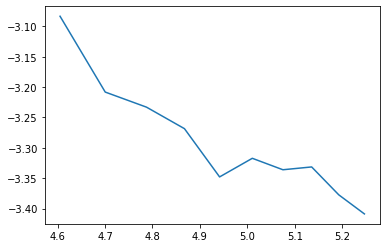

In [19]:
improper_erm_problems = [HardProblemForImproperERM(n=n) \
                        for n in np.arange(100, 200, step=10)]
improper_erm_experiment = ConvergenceRateExperiment(improper_erm_problems)
improper_erm_errors = improper_erm_experiment.sample_estimation_errors(
    n_seeds=1000, estimator=ImproperERM())
# To empirically establish that the improper ERM algorithm is **not**
# expecatation optimal, the slope in the graph generated above should be larger
# than -1.0 (e.g., slope -0.5 would correspond to the ``slow rate'').
plt.plot(np.log(improper_erm_experiment.ns),
         np.log(np.mean(improper_erm_errors, axis=1)))

##### Solution

The idea is to construct a problem that is just as hard for the `ImproperERM` as the `BiasedCoinProblem` is for the `ERMEstimator`.

Suppose that the ERM estimator does not attain the fast rate for a problem with
dictionary $\mathcal{A} = \{a_{1}, a_{2}\}$. It thus suffices to construct a problem class $\tilde{\mathcal{A}} = \{a_{1}, \tilde{a}_{3}\}$ with $r(\tilde{a}_{3}) \gg \max\{r(a_{1}), r(a_{2})\}$ and $\frac{a_{1} + \tilde{a}_{3}}{2} = a_{2}$. For such a problem instance, the `ImproperERM` estimator will ignore the function $\tilde{a}_{3}$ with high probability and hence the `ImproperERM` estimator applied to $\tilde{\mathcal{A}}$ will behave as the (proper) ERM estimator applied to the class $\mathcal{A}$.

We provide a sample implementation of this idea below:
```
class HardProblemForImproperERM(BiasedCoinProblem):
  """ A hard problem instance on which ImproperERM estimator fails to achieve
  the expectation optimal estimation error rate. """
  def __init__(self, n):
    super().__init__(n=n, m=2, gamma=0.5/np.sqrt(n))

    A = self.A.copy()
    # Replace the function A[1] (i.e., the function that represents an unbiased
    # coin) by a new function `endpoint_a` such that the function
    # A[1] = (A[0] + endpoint_a)/2 will be considered by the ImproperERM
    # estimator implemented above.
    def endpoint_a(X):
      return 2*A[1](X) - A[0](X)
    self.A[1] = endpoint_a
    self.r[1] = 6.0 + 4.0*self.gamma

  # Since we have modified the dictionary of the base class, we need to
  # adjust the implementation of computation of L2 squared norms.
  def compute_L2_squared_norm(self, w):
    return (w[0] - w[1])**2 + (2.0 * w[1])**2
```

#### Exercise 11.3

Using the intuition gained in Exercises 11.1 and 11.2, propose a deviation-optimal model selection aggregation algorithm that outputs a function in the set
$$
  (\mathcal{A} + \mathcal{A})/2 = \{(a + a')/2 : a,a' \in \mathcal{A}\}.
$$

Your algorithm should work for any dictionary size $m > 2$ and it is allowed to be parametrized by the desired confidence level $\delta$. That is, given $\delta \in (0, 1)$, propose a procedure $W_{\delta}$ such that
$$
  \mathbb{P}_{Z_{1}^{n}}
  \left(
    \mathcal{E}(W_{\delta}) \geq c\frac{\log(m/\delta)}{n}
  \right)
  \leq \delta.
$$
for some absolute constant $c$.

##### Hint

First consider the case $m=2$. When does empirical risk minimization over $\mathcal{A}$ yield a deviation optimal algorithm? When does it make sense to consider the midpoint $(a_{1} + a_{2})/2$ in addition to the class $\mathcal{A} = \{a_{1}, a_{2}\}$?

##### Solution

Let $a^{\star}$ denote the population risk minimizer among $\mathcal{A}$.
For any function $a : \mathcal{X} \to \mathcal{Y}$, define the event
$$
  E_{a} = \left\{r(a) - r(a^{\star}) \leq R(a) - R(a^{\star})
  +  12\sqrt{\frac{\|a - a^{\star}\|_{n}^{2}\log(2m^{2}/\delta)}{n}}
  + 8\frac{\log(2m^{2}/\delta)}{n}\right\}
$$
and let
$$
  E = \cup_{a \in (\mathcal{A} + \mathcal{A})/2} E_{a}.
$$
By Exercise 11.1, we have
$$
  \mathbb{P}_{Z_{1}^{n}}\left( E \right) \geq 1 - \delta.
$$
In the rest of what follows we work conditionally on the event $E$.



Let $A^{(ERM)} \in \mathrm{argmin}_{a \in \mathcal{A}} R(a)$ denote any empirical risk minimizer over $\mathcal{A}$. Given the desired confidence parameter $\delta$, define the random set of "almost empirical risk minimizers'' by
$$
  \widehat{\mathcal{A}}_{\delta} = \left\{
    a \in \mathcal{A} : 
    R(a) \leq R(A^{(ERM)}) + 12\sqrt{\frac{\|A^{(ERM)} - a\|_{n}^{2}\log(2m^{2}/\delta)}{n}}
     + 8\frac{\log(2m^{2}/\delta)}{n}
  \right\}.
$$
<font color='green'>**We now define our estimator $A^{(MID)}$ as an empirical risk minimizer over the set
$(A^{(ERM)} + \widehat{\mathcal{A}}_{\delta})/2$, that is:**</font>
$$
  A^{(MID)} \in \mathrm{argmin}_{a \in \widehat{\mathcal{A}}_{\delta}} R\left(
    \frac{A^{(ERM)} + a}{2}\right).
$$
Let $A'$ denote the element in $\widehat{\mathcal{A}}_{\delta}$
$$
  A' = \mathrm{argmax}_{a \in \widehat{\mathcal{A}}_{\delta}}\|A^{(ERM)} - a\|_{n}^{2}
  \quad\text{and let}\quad
  D = \|A^{(ERM)} - A'\|_{n}^{2}.
$$
Notice that on the event $E$, using the fact that
$r(a^{\star}) \leq r(A^{(ERM)})$ it holds that
$$
  a^{\star} \in \widehat{\mathcal{A}}_{\delta}
  \quad\text{and in particular,}\quad
  \|A^{(MID)} - a^{\star}\|_{n}^{2} \leq \frac{9}{4}D.
$$
Hence, on the event $E$ we have
\begin{align*}
  \mathcal{E}(A^{(MID)})
  &= r(A^{(MID)}) - r(a^{\star})
  \\
  &\leq R(A^{(MID)}) - R(a^{\star})
  + 12\sqrt{\frac{\|A^{(MID)} - a^{\star}\|_{n}^{2}\log(2m^{2}/\delta)}{n}}
     + 8\frac{\log(2m^{2}/\delta)}{n}
  \\
  &\leq R(A^{(MID)}) - R(a^{\star})
  + 18\sqrt{\frac{D\log(2m^{2}/\delta)}{n}}
     + 8\frac{\log(2m^{2}/\delta)}{n}
  \\
  &\leq R\left(\frac{A^{(ERM)} + A'}{2}\right) - R(a^{\star})
  + 18\sqrt{\frac{D\log(2m^{2}/\delta)}{n}}
     + 8\frac{\log(2m^{2}/\delta)}{n}
  \\
  &= \frac{1}{2}R(A^{(ERM)}) + \frac{1}{2}R(A') - \frac{1}{4}D - R(a^{\star})
  + 18\sqrt{\frac{D\log(2m^{2}/\delta)}{n}}
     + 8\frac{\log(2m^{2}/\delta)}{n}
  \\
  &\leq \underbrace{R(A^{(ERM)}) - R(a^{\star})}_{\leq 0}
  + \underbrace{24\sqrt{\frac{D\log(2m^{2}/\delta)}{n}}
  - \frac{1}{4}D}_{\leq 576\log(2m^{2}/\delta)/n \text{ by optimizing with respect to }\sqrt{D}}
     + 12\frac{\log(2m^{2}/\delta)}{n}
  \\
  &\leq
  588\frac{\log(2m^{2}/\delta)}{n}.
\end{align*}
Our proof is complete.

### Exercise 12

Implement the algorithm described in the solution of Exercise 11.3 by filling in the missing code in the next cell.

In [20]:
class MidpointEstimator(Estimator):

  def __init__(self, delta):
    """ :delta: The desired confidence level. """
    self.delta = delta

  def fit(self, problem):
    ############################################################################
    # Exercise 12. Fill in the implementation details below.

    # First find an empirical risk minimizer over the class A.
    erm = ERM()
    erm_w = erm.fit(problem)
    erm_idx = np.argmax(erm_w)

    # We now implement a function to check if a function `a` belongs to the
    # set of almost minimizers \in \widehat{A}_{\delta}.
    R_erm = problem.compute_empirical_risk(problem.A[erm_idx])
    m = len(problem.A)
    a_erm_X = problem.A[erm_idx](problem.X) 
    def is_almost_minimizer(a):
      a_X = a(problem.X)
      l2_dist = np.average((a_erm_X - a_X)**2)
      log_term = np.log(2.0*m**2/self.delta)/problem.n
      R_a = problem.compute_empirical_risk(a)

      if R_a <= R_erm + 12.0 * np.sqrt(l2_dist * log_term) + 8.0 * log_term:
        return True
      else:
        return False

    # We will now loop through the elements of problem.A and consider the
    # midpoints between A^(ERM) and almost minimizers as potential candidate
    # functions.
    R = np.zeros(len(problem.A))
    for endpoint_idx in range(len(problem.A)):
      if not is_almost_minimizer(problem.A[endpoint_idx]):
        # The function a_{endpoint_idx} is not in the set of almost minimizers
        # of the empirical risk.
        R[endpoint_idx] = np.infty
        continue
      
      # Define the midpoint function.
      def midpoint_a(X):
        return (problem.A[erm_idx](X) + problem.A[endpoint_idx](X))/2.0
      R[endpoint_idx] = problem.compute_empirical_risk(midpoint_a)
      
    best_endpoint_idx = np.argmin(R)
    mid_w = erm_w / 2.0
    mid_w[best_endpoint_idx] += 0.5
    return mid_w
    ############################################################################

In the next code cell we repeat the experiment used to empirically suggest deviation-suboptimality of the exponential weights algorithm.

In [21]:
biased_coin_problems = [BiasedCoinProblem(n=n, m=2, gamma=0.5/np.sqrt(n)) \
                        for n in np.arange(100, 200, step=10)]
biased_coin_experiment = ConvergenceRateExperiment(biased_coin_problems)
midpoint_estimator_errors = biased_coin_experiment.sample_estimation_errors(
    n_seeds=10000, estimator=MidpointEstimator(delta=1.0/10000))

# The maximumum estimation error printed below should be 0.
print("Maximum estimation error:", np.max(midpoint_estimator_errors))



Maximum estimation error: 0.0


#### Solution

The algorithm described in the solution of Exercise 11.3 can be implemented as
follows:
```
    # First find an empirical risk minimizer over the class A.
    erm = ERM()
    erm_w = erm.fit(problem)
    erm_idx = np.argmax(erm_w)

    # We now implement a function to check if a function `a` belongs to the
    # set of almost minimizers \in \widehat{A}_{\delta}.
    R_erm = problem.compute_empirical_risk(problem.A[erm_idx])
    m = len(problem.A)
    a_erm_X = problem.A[erm_idx](problem.X) 
    def is_almost_minimizer(a):
      a_X = a(problem.X)
      l2_dist = np.average((a_erm_X - a_X)**2)
      log_term = np.log(2.0*m**2/self.delta)/problem.n
      R_a = problem.compute_empirical_risk(a)

      if R_a <= R_erm + 12.0 * np.sqrt(l2_dist * log_term) + 8.0 * log_term:
        return True
      else:
        return False

    # We will now loop through the elements of problem.A and consider the
    # midpoints between A^(ERM) and almost minimizers as potential candidate
    # functions.
    for endpoint_idx in range(len(problem.A)):
      if not is_almost_minimizer(problem.A[endpoint_idx]):
        # The function a_{endpoint_idx} is not in the set of almost minimizers
        # of the empirical risk.
        continue
      
      # Define the midpoint function.
      def midpoint_a(X):
        return (problem.A[erm_idx](X) + problem.A[endpoint_idx](X))/2.0
      R[endpoint_idx] = problem.compute_empirical_risk(midpoint_a)
      
    best_endpoint_idx = np.argmin(R)
    mid_w = erm_w / 2.0
    mid_w[best_endpoint_idx] += 0.5
    return mid_w
```

## Bibliographic Remarks

The problem of model selection aggregation, among closely related problems of convex and linear aggregation, were studied in the context of non-parametric statistics by *Nemirovski [2000]*. Minimax optimal rates of aggregation for all three problems were established by *Tsybakov [2003]*; see the book by *Tsybakov [2008]* for an introduction to the techniques used to prove information-theoretic lower bounds. In statistics literature, the exponential weights algorithm was used for the model selection aggregation problem, among others, by *Catoni [1997]* and *Yang [2004]*. The exponential weights algorithm itself, however, has much older roots in sequential prediction and game theory; see the textbook by *Cesa-Bianchi and Lugosi [2006]* for historical remarks and further references. It was first established that the exponential weights algorithm is deviation suboptimal by *Audibert [2008]*, where the first deviation-optimal procedure was proposed. Further deviation-optimal procedures
were introduced by *Lecué and Mendelson [2009], Lecué and Rigollet [2014]* and *Wintenberger [2017]*.

**References**

J.-Y. Audibert. Progressive mixture rules are deviation suboptimal. In Advances in Neural Information Processing Systems, pages 41–48, 2008.

O. Catoni. The mixture approach to universal model selection. In École Normale Supérieure. Citeseer, 1997.

N. Cesa-Bianchi and G. Lugosi. Prediction, learning, and games. Cambridge university press, 2006.

G. Lecué and S. Mendelson. Aggregation via empirical risk minimization. Probability theory and related fields, 145(3-4):591–613, 2009.

G. Lecué and P. Rigollet. Optimal learning with q-aggregation. Annals of Statistics, 42(1): 211–224, 2014.

A. Nemirovski. Topics in non-parametric statistics. Ecole d’Eté de Probabilités de Saint-Flour, 28:85, 2000.

A. B. Tsybakov. Optimal rates of aggregation. Conference on Learning Theory, pages 303–313, 2003.

A. B. Tsybakov. Introduction to nonparametric estimation. Springer Science & Business Media, 2008.

O. Wintenberger. Optimal learning with bernstein online aggregation. Machine Learning, 106(1):119–141, 2017.

Y. Yang. Aggregating regression procedures to improve performance. Bernoulli, 10(1): 25–47, 2004.

## Acknowledgements

We thank Nikita Zhivotovskiy for pointing out the short proof of deviation-optimal aggregation via midpoint estimator described in the solution of Exercise 11.3.